In [1]:
from ldpc_bpsk_gaussian_system import LdpcBpskGaussianSystem
from utils import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [3]:
N = 1001
n_groups = 10
N_bits = N * n_groups
dv = 3
dc = 7
max_iter = 50
Eb = 1
snr_db_values = np.arange(0, 5.5, 0.5)
N0_values = [N0_from_db_value(i, Eb) for i in snr_db_values]
original = np.zeros(N_bits)
info_bit_error_probas = []
uncoded_info_bit_error_probas = []

for N0 in N0_values:
    system = LdpcBpskGaussianSystem(N0, Eb, dv, dc, N, max_iter)
    decoded_bits_groups = []
    uncoded_bits_groups = []
    for i in tqdm(range(n_groups)):
        decoded_bits_groups.append(system.apply_noise_and_decode()) 
        uncoded_bits_groups.append(system.get_uncoded_bits())
    decoded_bits_groups = np.array(decoded_bits_groups)
    uncoded_bits_groups = np.array(uncoded_bits_groups)
    decoded = decoded_bits_groups.reshape(-1)
    uncoded = uncoded_bits_groups.reshape(-1)
    info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
    info_bit_error_probas.append(info_bit_error_proba)
    uncoded_info_bit_error_proba = np.not_equal(original, uncoded).sum()/len(original)
    uncoded_info_bit_error_probas.append(uncoded_info_bit_error_proba)

100%|██████████| 10/10 [00:01<00:00,  5.30it/s]


In [4]:
info_bit_error_probas

[0.05374625374625375,
 0.03626373626373627,
 0.02967032967032967,
 0.012487512487512488,
 0.012687312687312687,
 0.005394605394605395,
 0.002197802197802198,
 0.0003996003996003996,
 0.0002997002997002997,
 9.99000999000999e-05,
 9.99000999000999e-05]

In [6]:
uncoded_info_bit_error_probas

[0.07832167832167833,
 0.06833166833166833,
 0.06133866133866134,
 0.045754245754245755,
 0.04265734265734266,
 0.03036963036963037,
 0.01968031968031968,
 0.016883116883116882,
 0.012087912087912088,
 0.00919080919080919,
 0.0058941058941058945]

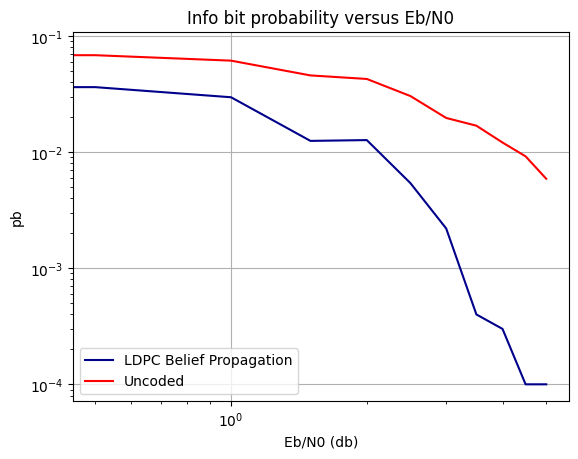

In [8]:
fig, ax = plt.subplots(1, 1)
ax.loglog(snr_db_values, info_bit_error_probas, color="darkblue")
ax.loglog(snr_db_values, uncoded_info_bit_error_probas, color="red")
ax.grid()
ax.set_title("Info bit probability versus Eb/N0")
ax.set_xlabel("Eb/N0 (db)")
ax.set_ylabel("pb")
ax.legend(["LDPC Belief Propagation", "Uncoded"])